Explanation:
The goal of this project is to classify images from the CIFAR-10 dataset into 10 different classes (such as airplane, cat, dog, etc.) using a Convolutional Neural Network (CNN).

Method:
I preprocessed the dataset by normalizing the images to a range of 0-1 and applying data augmentation techniques. A CNN model was then built and trained using TensorFlow to classify the images into the correct categories.

Libraries:
pandas, numpy, matplotlib, tensorflow, scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

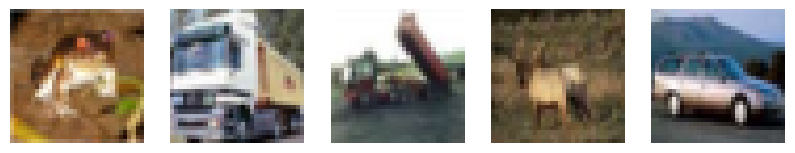

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

fig,axes=plt.subplots(1,5,figsize=(10,15))

for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")
plt.show()    

labels=["Airplane" , "Automobile" , "Bird" , "Cat" , "Deer" , "Dog" , "Frog" , "Horse" , "Ship" , "Truck"]

In [ ]:
X_train=X_train.astype("float32")/255
X_test=X_test.astype("float32")/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
data_gen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
    )
data_gen.fit(X_train)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",activation="relu",input_shape=X_train.shape[1:]))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.0001,decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

model.fit(data_gen.flow(X_train,y_train,batch_size=64),epochs=50,validation_data=(X_test,y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.1940 - loss: 2.1399 - val_accuracy: 0.3428 - val_loss: 1.7934
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.3248 - loss: 1.8341 - val_accuracy: 0.4094 - val_loss: 1.6128
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.3649 - loss: 1.7308 - val_accuracy: 0.4409 - val_loss: 1.5296
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.3914 - loss: 1.6667 - val_accuracy: 0.4661 - val_loss: 1.4667
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4131 - loss: 1.6115 - val_accuracy: 0.4529 - val_loss: 1.4744
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4268 - loss: 1.5688 - val_accuracy: 0.5091 - val_loss: 1.3626
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4464 - loss: 1.5331 - val_accuracy: 0.4899 - val_loss: 1.3966
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4583 - loss: 1.5066 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


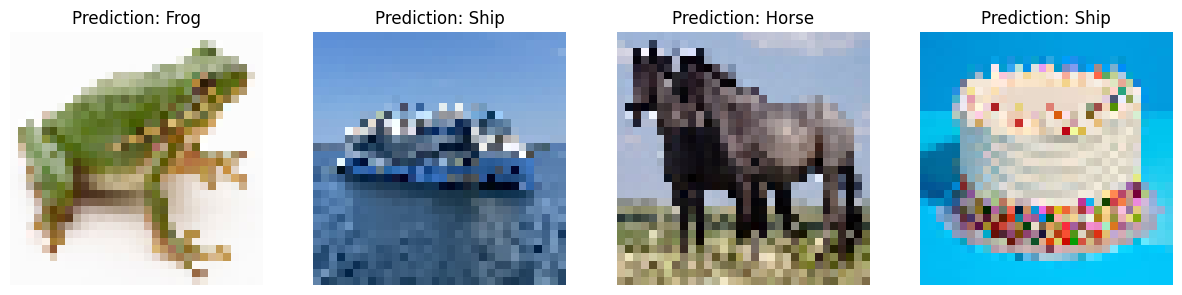

In [ ]:
from tensorflow.keras.preprocessing import image

img_path1 = r"File_path=>1.jpg"
img_path2 = r"File_path=>2.jpg"
img_path3 = r"File_path=>3.jpg"
img_path4 = r"File_path=>4.jpg"

img_path=[img_path1,img_path2,img_path3,img_path4]
plt.figure(figsize=(15,15))
for i in range(4): 
    plt.subplot(1,4,i+1)

    img = image.load_img(img_path[i], target_size=(32, 32))

    img_array = image.img_to_array(img)

    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis=0)

    y_pred = model.predict(img_array)

    predicted_class = np.argmax(y_pred, axis=1)

    plt.title(f'Prediction: {labels[predicted_class[0]]}')

    plt.imshow(img)
    plt.axis('off')
plt.show()
